#### Import de librerías y directorios

In [1]:
import os
import scipy.sparse as sparse
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import rasterstats
from shapely.geometry import Point, Polygon, LineString

import matplotlib.pyplot as plt
%matplotlib inline

# directory names
raster_dir = "raster/"
shape_dir = "shape/"


##### Visualización previa del geojson

<AxesSubplot:>

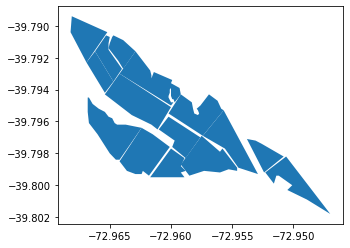

In [2]:
potreros = gpd.read_file(shape_dir+"agrospace_piloto.geojson")
potreros.plot()

In [3]:
print(potreros.head())

   Sector   ID          Name          area  \
0     1.0  1.0  Punta estero  41369.504460   
1     1.0  2.0        Laurel  22633.602809   
2     1.0  3.0       Patagua  24631.063595   
3     1.0  4.0   Lado estero  22348.761392   
4     2.0  1.0        Maiz 2  80783.875155   

                                            geometry  
0  POLYGON ((-72.96810 -39.78940, -72.96520 -39.7...  
1  POLYGON ((-72.96540 -39.79420, -72.96690 -39.7...  
2  POLYGON ((-72.96470 -39.79350, -72.96620 -39.7...  
3  POLYGON ((-72.96480 -39.79070, -72.96470 -39.7...  
4  POLYGON ((-72.96540 -39.79430, -72.96420 -39.7...  


##### Procesamiento de datos

In [4]:
def find_nodata_val(src_readed):
    # normally, src.nodatavals[0] would do it, but it seems that the actual value used in src does not match
    for i in range(len(src_readed)):
        for j in range(len(src_readed[i])):
            if src_readed[i][j] < 0:
                return src_readed[i][j]

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


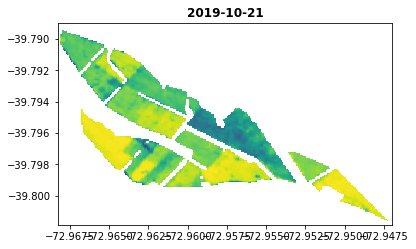

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


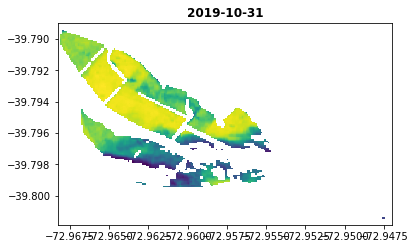

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


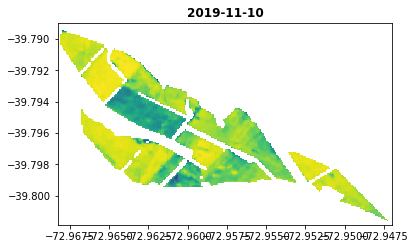

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


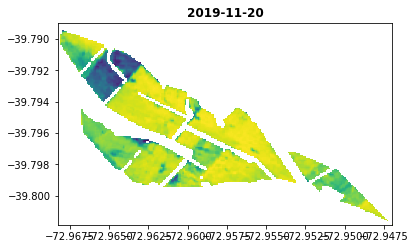

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


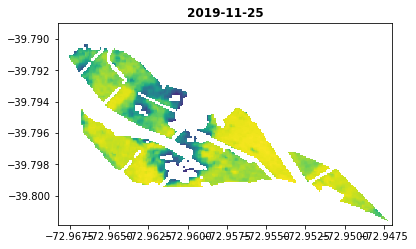

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


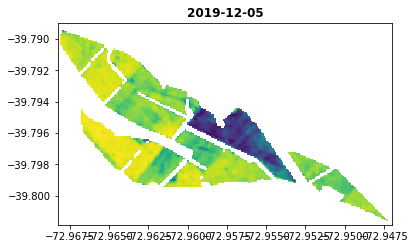

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


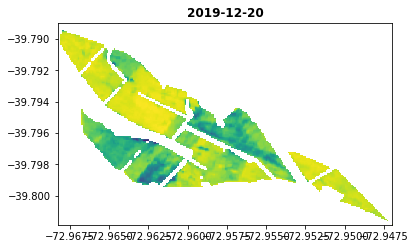

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


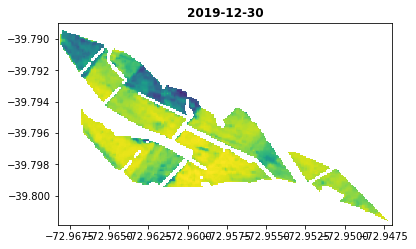

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


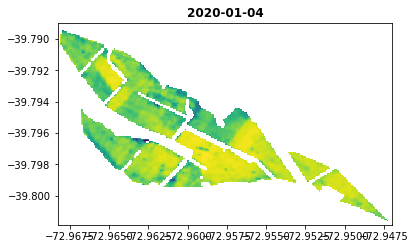

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


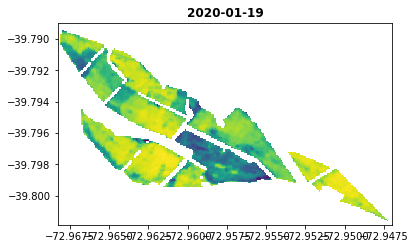

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


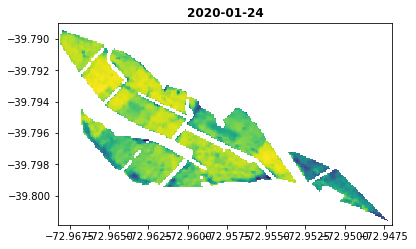

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


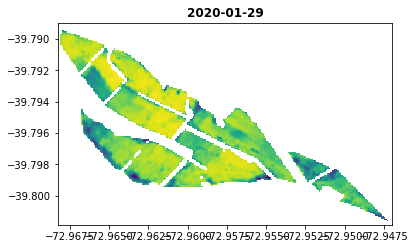

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


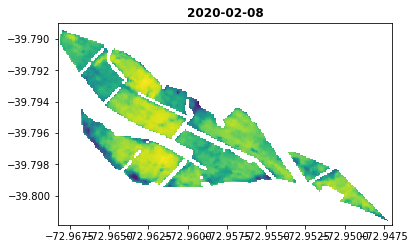

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


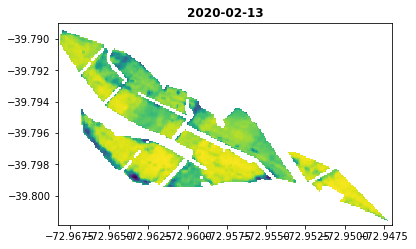

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


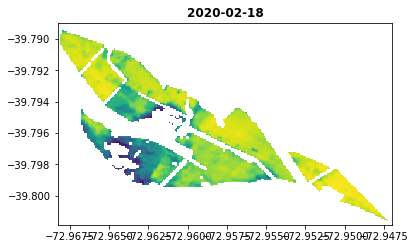

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


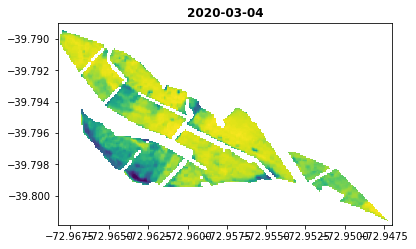

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


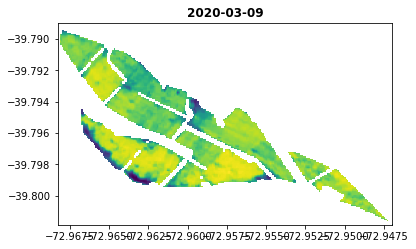

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


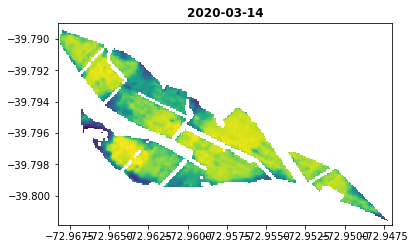

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


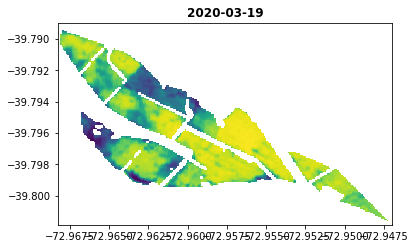

<Figure size 432x288 with 0 Axes>

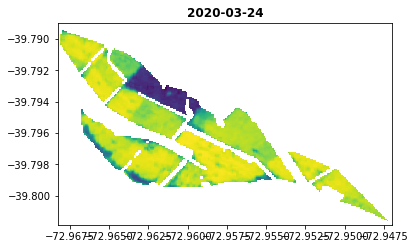

<Figure size 432x288 with 0 Axes>

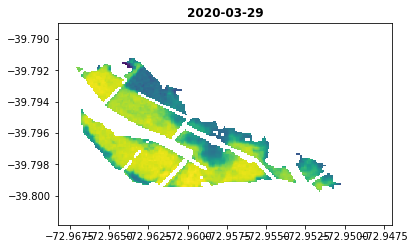

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


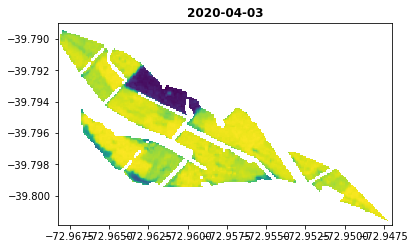

<Figure size 432x288 with 0 Axes>

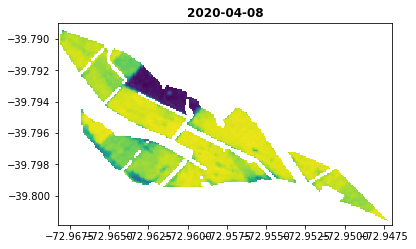

<Figure size 432x288 with 0 Axes>

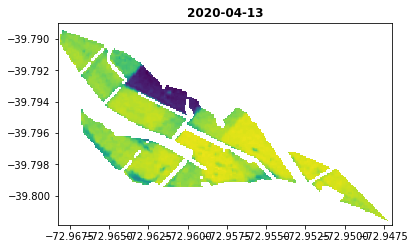

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


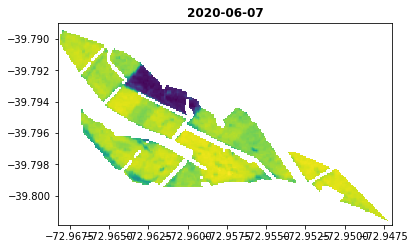

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


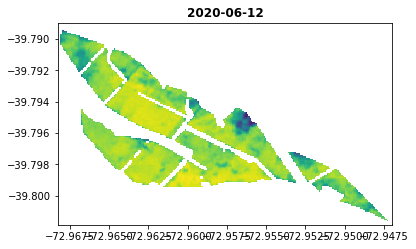

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


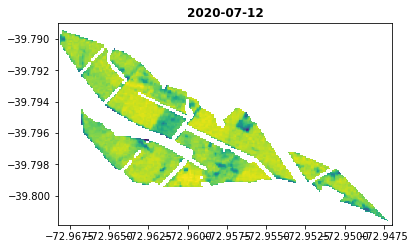

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


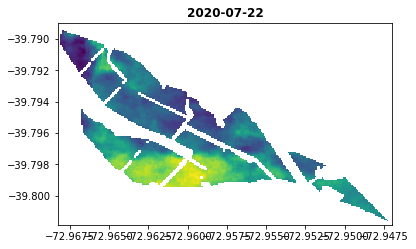

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


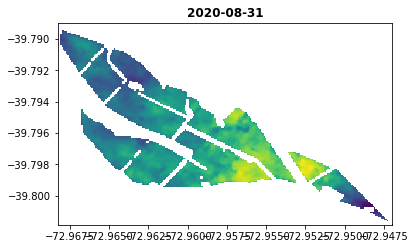

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


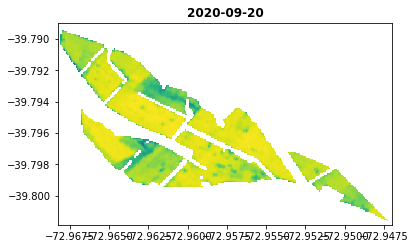

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


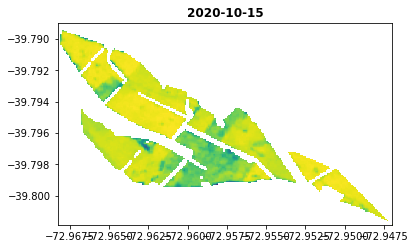

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


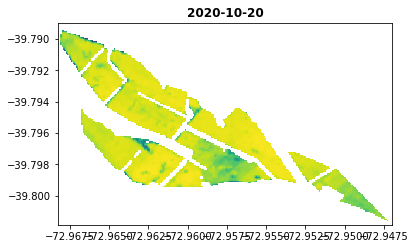

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


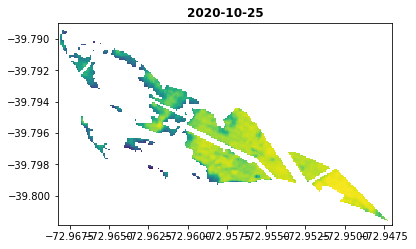

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


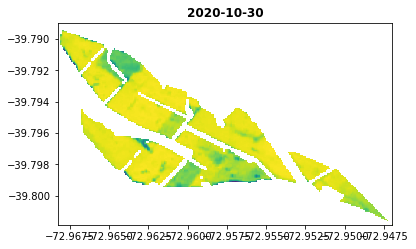

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


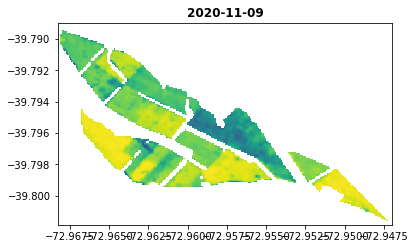

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


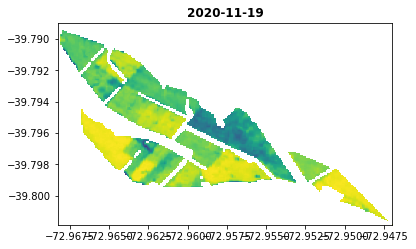

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


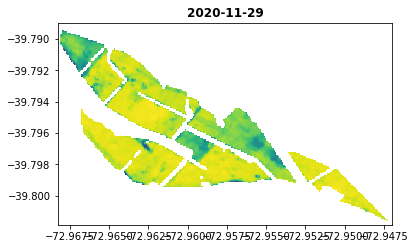

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


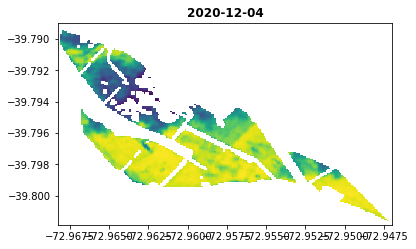

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


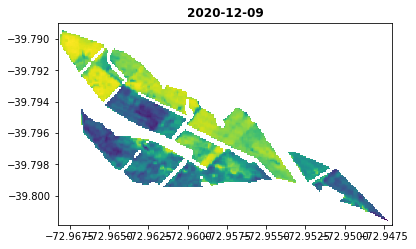

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


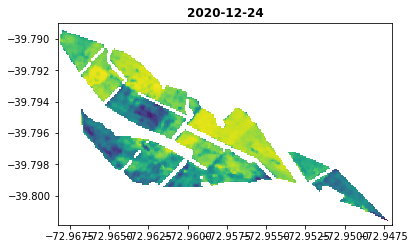

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


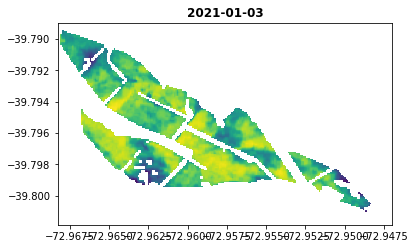

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


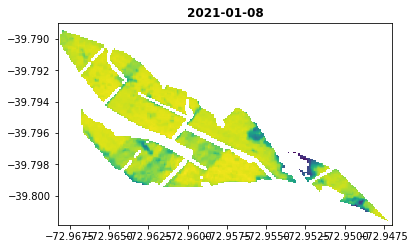

<Figure size 432x288 with 0 Axes>

In [5]:

# metrics
measured_data = []

for raster in os.listdir(raster_dir):
    # we ensure the files we're going to read have the extension .tif
    if (raster[-4:] == '.tif'):
        
        date = raster.replace('agrospace_piloto_', '')
        date = date.replace('.tif', '')
        
        # raster to np array
        src = rasterio.open(raster_dir+raster)
        nodataval = find_nodata_val(src.read(1))
        
        measured_data.append(rasterstats.zonal_stats(potreros, src.read(1), affine = src.transform, nodata=nodataval, stats="count min mean std max median", 
                                                     geojson_out = True))
        for i in range(len(measured_data[-1])):
            measured_data[-1][i]['date'] = date  # añadimos la fecha al diccionario
        
        # plotting
        fig, ax = plt.subplots(1, 1)
        show(rasterio.open(raster_dir+raster), title = date)
        potreros.plot(ax=ax, facecolor='None', edgecolor = 'red')
        plt.show()
        
        
        
        

In [6]:
potreros = {}

def combined_mean(x1, n1, x2, n2):
    return (x1*n1 + x2*n2) / (n1+n2)

for p in range(len(measured_data[0])):
    for t in range(len(measured_data)):  # for each potrero, iterate over the time dictionaries
        name = measured_data[t][p]['properties']['Name']
        if (name not in potreros.keys()):
            potreros[name] = {}
            potreros[name]['count'] = 0
            potreros[name]['mean'] = 0
        
        if (measured_data[t][p]['properties']['mean'] is not None):
            potreros[name]['mean'] = combined_mean(potreros[name]['mean'], potreros[name]['count'], measured_data[t][p]['properties']['mean'], measured_data[t][p]['properties']['count'])
            potreros[name]['count'] += measured_data[t][p]['properties']['count']
        else:
            print(f"'None' mean value in {t}, {p}")

# vemos cómo quedó
potreros

'None' mean value in 1, 11


{'Punta estero': {'count': 21542, 'mean': 0.6869895058211861},
 'Laurel': {'count': 11919, 'mean': 0.6953780474645226},
 'Patagua': {'count': 13077, 'mean': 0.7069154097357137},
 'Lado estero': {'count': 11854, 'mean': 0.6833478347238064},
 'Maiz 2': {'count': 42927, 'mean': 0.6961607849049886},
 'Maiz 1': {'count': 32256, 'mean': 0.5951252131619387},
 'Pero a': {'count': 30917, 'mean': 0.6791081397185122},
 'Los bolos a': {'count': 19987, 'mean': 0.7060206864565401},
 'El pero b': {'count': 30659, 'mean': 0.7033114909683204},
 'Los bolos b': {'count': 31527, 'mean': 0.7205316125198052},
 'Las piedras': {'count': 15300, 'mean': 0.6956205810723352},
 'Peña a': {'count': 13349, 'mean': 0.710624350742632},
 'Peña b': {'count': 24463, 'mean': 0.714134877463181},
 'Brazo Muerto': {'count': 34795, 'mean': 0.686549326594807},
 'La isla': {'count': 35943, 'mean': 0.6747425466847823}}

In [7]:
# ejemplo de uno de los datos
measured_data[0][0]

{'id': '0',
 'type': 'Feature',
 'properties': {'ID': 1.0,
  'Name': 'Punta estero',
  'Sector': 1.0,
  'area': 41369.504460029304,
  'min': 0.17624999582767487,
  'max': 0.7881987690925598,
  'mean': 0.6413577264933674,
  'count': 540,
  'std': 0.07386996942079899,
  'median': 0.6605344712734222},
 'geometry': {'type': 'Polygon',
  'coordinates': (((-72.9681, -39.7894),
    (-72.9652, -39.7904),
    (-72.9669, -39.7923),
    (-72.9682, -39.7904),
    (-72.9681, -39.7894)),)},
 'bbox': (-72.9682, -39.7923, -72.9652, -39.7894),
 'date': '2019-10-21'}

### Gráficos del promedio de los Potreros en el tiempo

#### Gráfico general

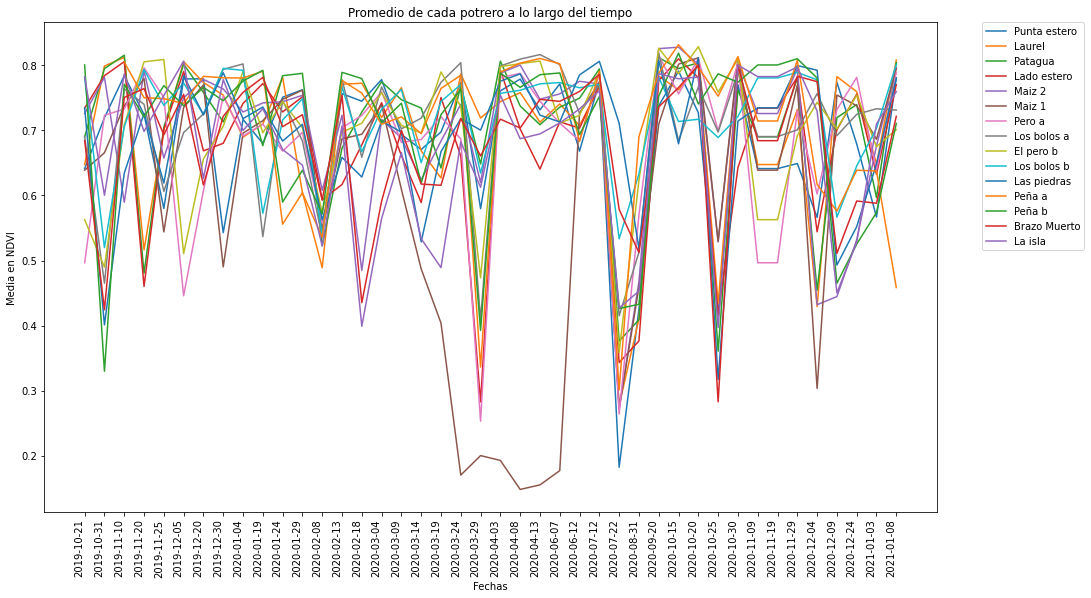

In [8]:
date_list = []
for data in measured_data:
    date_list.append(data[0]['date'])

means01 = []
for data in measured_data:
    means01.append(data[0]['properties']['mean'])


plt.figure(figsize=(16,9))
plt.xticks(rotation=90, ha='right')
plt.plot(date_list, means01, label=data[0]['properties']['Name'])

for i in range(1, len(measured_data[0])):
    means = []
    for data in measured_data:
        means.append(data[i]['properties']['mean'])
    plt.plot(means, label=data[i]['properties']['Name'])

plt.title("Promedio de cada potrero a lo largo del tiempo")
plt.xlabel("Fechas")
plt.ylabel("Media en NDVI")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#### Comparando potreros para las fechas 24/01/2020 y 08/01/2021

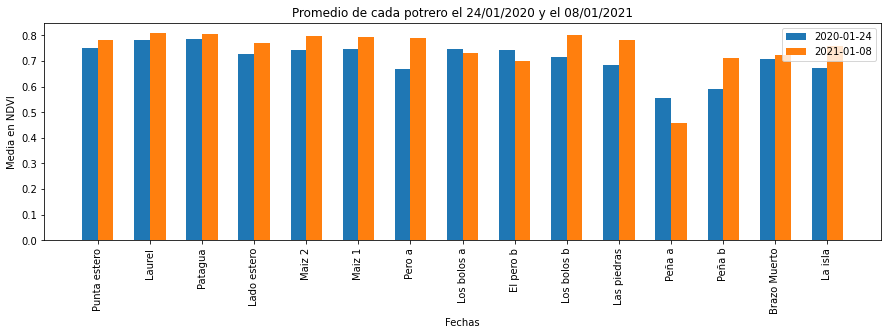

In [9]:
compared_data = []
for i in range(len(measured_data)):
    if (measured_data[i][0]['date'] in ['2020-01-24', '2021-01-08']):
        compared_data.append(measured_data[i])

potreros_name = []
for i in range(len(measured_data[0])):
    potreros_name.append(measured_data[0][i]['properties']['Name'])


fig, ax = plt.subplots()
x = np.arange(len(potreros_name))
width = 0.3

# fecha 1:
mean_date1 = []
for data in compared_data[0]:
    mean_date1.append(data['properties']['mean'])
#ax.bar(potreros_name, mean_info, width)
rects1 = ax.bar(x - width/2, mean_date1, width, label=data['date'])

# fecha 2:
mean_date2 = []
for data in compared_data[1]:
    mean_date2.append(data['properties']['mean'])
#ax.bar(potreros_name, mean_info, width)
rects2 = ax.bar(x + width/2, mean_date2, width, label=data['date'])


# plot information
ax.set_title("Promedio de cada potrero el 24/01/2020 y el 08/01/2021")
ax.set_xlabel("Fechas")
ax.set_ylabel("Media en NDVI")
ax.set_xticks(x)
ax.set_xticklabels(potreros_name, rotation=90)
ax.legend()
fig.set_figwidth(15)

De lo que se observa que el mejor potrero puede ser variable a lo largo del tiempo. Por ejemplo, para la primera fecha el potrero con mejores resultados promedio fue Patagua, pero para la segunda fue laurel, aunque con 0.4 de diferencia.

#### Serie temporal de cada potrero

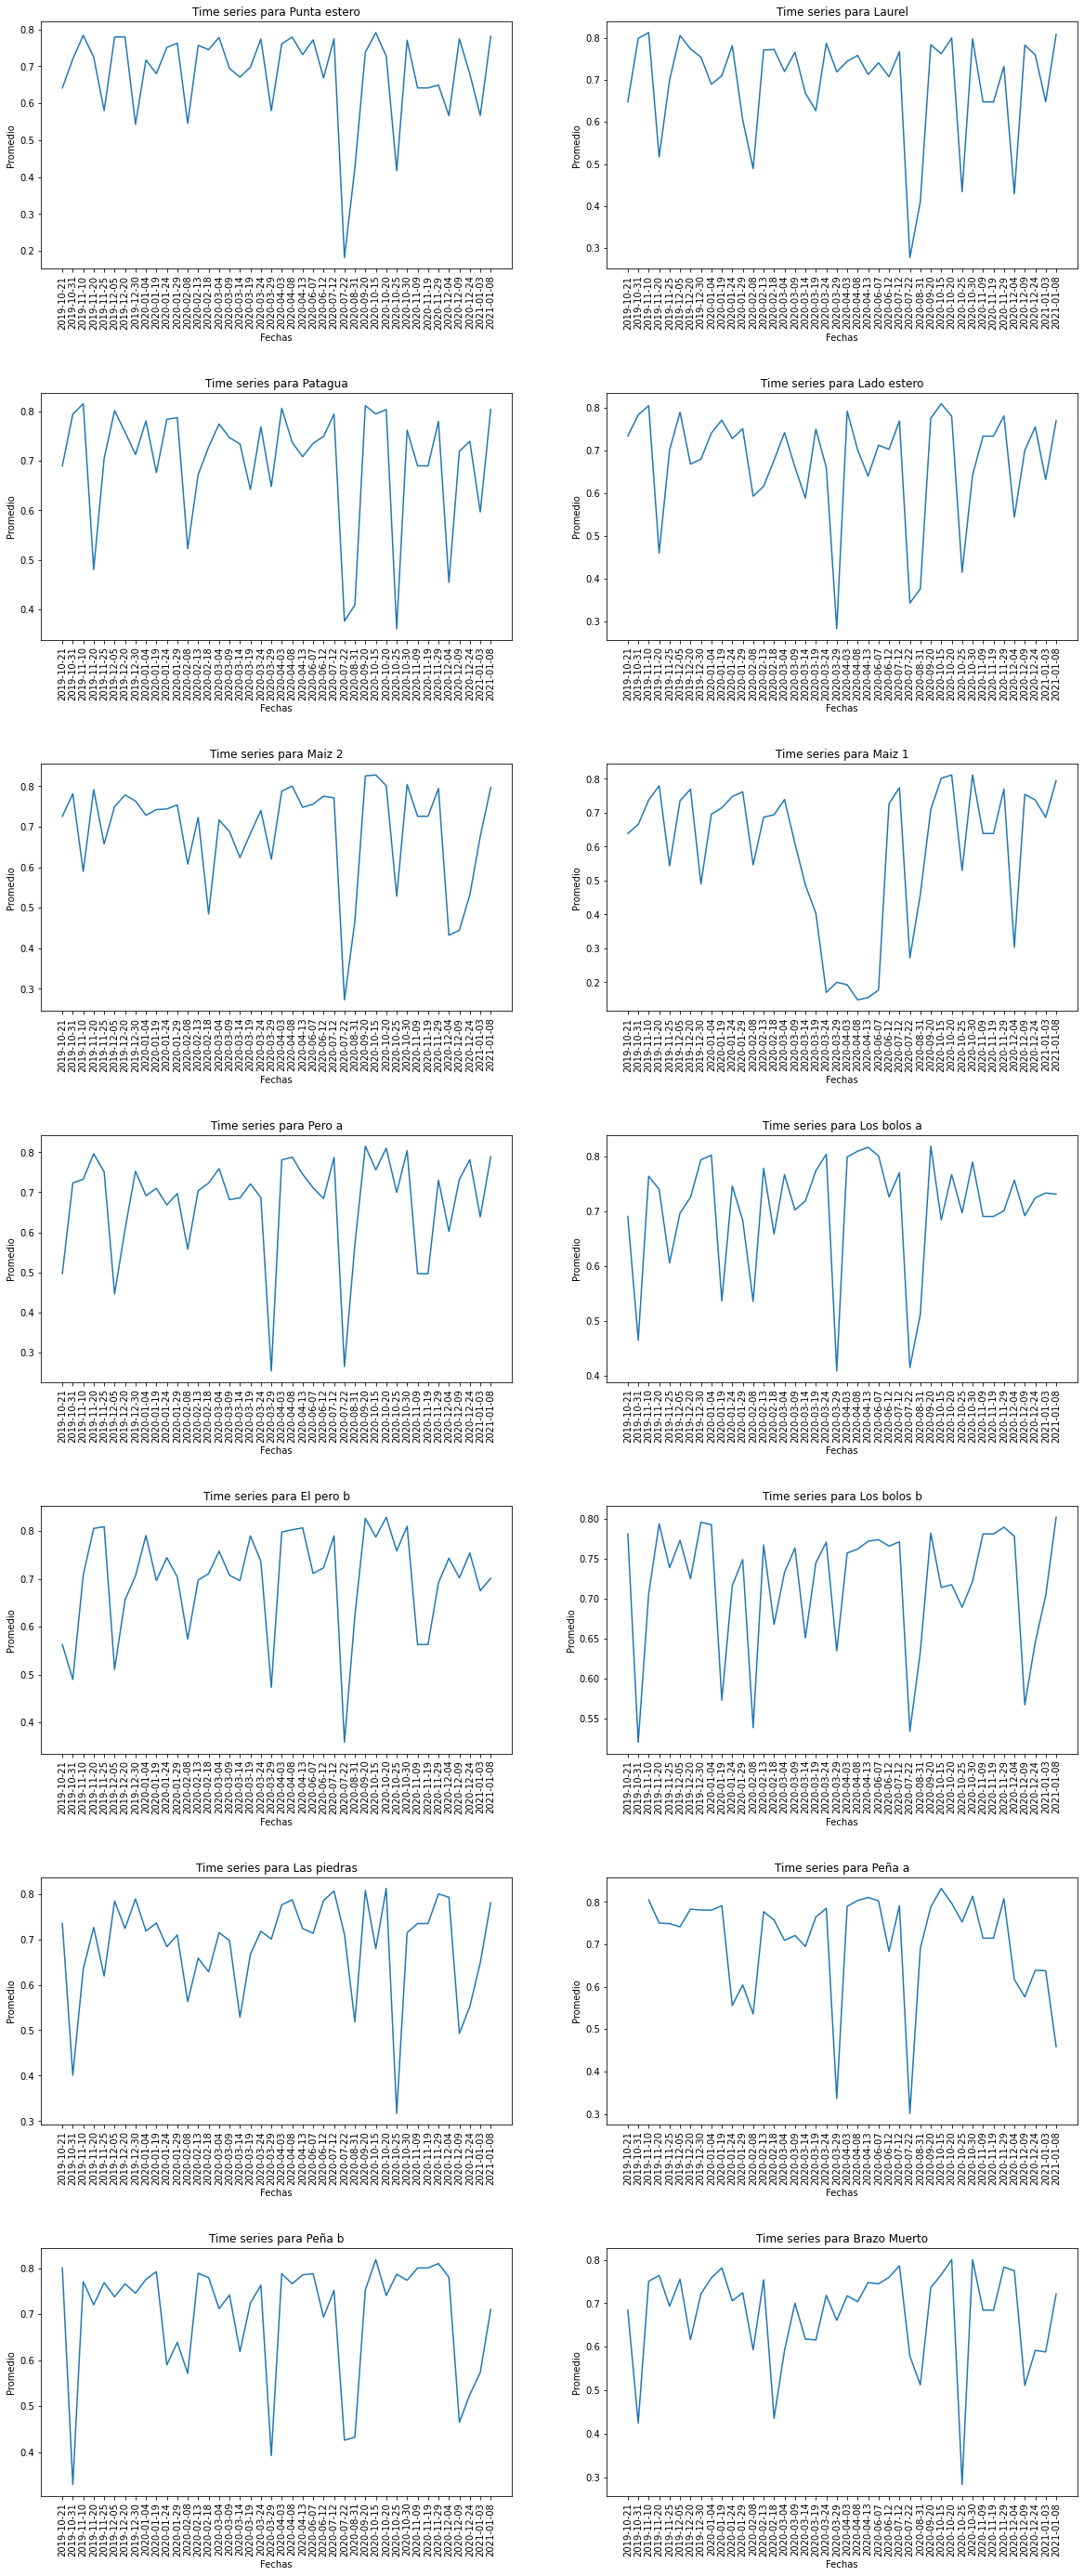

In [10]:
fig, axs = plt.subplots(7, 2, figsize=(20, 49))
# avoiding overlap
fig.subplots_adjust(hspace=0.5)

potrero = 0
for ax_i in range(len(axs)):
    for ax_j in range(len(axs[ax_i])):
        ax = axs[ax_i][ax_j]
        # for each potrero, we get the displayable information
        dates = []
        means = []
        for f in range(len(measured_data)):
            dates.append(measured_data[f][potrero]['date'])
            means.append(measured_data[f][potrero]['properties']['mean'])
        
        ax.plot(dates, means)
        for tick in ax.get_xticklabels():  # rorating the x-labels
            tick.set_rotation(90)
        
        ax.set_title("Time series para " + measured_data[f][potrero]['properties']['Name'])
        ax.set_xlabel("Fechas")
        ax.set_ylabel("Promedio")
        potrero += 1